<h1 class='font-effect-fire-animation' style='color:slategray; font-family:Akronim;'> 🌐 Python Modules, Styling, Helpful Functions, and Links </h1>
[Github Version](https://github.com/OlgaBelitskaya/deep_learning_projects/tree/master/DL_PP4) & [Colaboratory Version](https://colab.research.google.com/drive/1r5yRD-3tQwN6lSql_VRoVuwQ8DaY5zUt)

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Akronim|Roboto&effect=3d|fire-animation');
body {background-color: gainsboro;} 
a,h4 {color:#37c9e1; font-family:Roboto;} 
span {color:black; text-shadow:4px 4px 4px #aaa;}
div.output_prompt,div.output_area pre {color:slategray;}
div.input_prompt,div.output_subarea {color:#37c9e1;}      
div.output_stderr pre {background-color:gainsboro;}  
div.output_stderr {background-color:slategrey;}       
</style>

In [2]:
from IPython import display
fpath='../input/style/'
lf=['0_0_026.jpeg','1_3_003.jpeg','2_2_039.jpeg',
    '3_5_012.jpeg','4_1_019.jpeg','5_9_005.jpeg','6_8_004.jpeg']
display.HTML("""<style>
@import url('https://fonts.googleapis.com/css?family=Akronim|Monsieur La Doulaise');
</style><table style='width:50%; background-color:silver; color:#37c9e1;
                      font-family:Monsieur La Doulaise; font-size:250%;'>
<tr style='font-family:Akronim; font-size:70%;'><th><center>Brand</center></th>
<th><center>Image</center></th></tr>
<tr><td><center>Christian Louboutin</center></td><td><center>
<img width='70' height='70' 
src='https://olgabelitskaya.github.io/images/0_0_026.jpeg' alt='brand0'>
</center></td></tr>
<tr><td><center>Chanel</center></td><td><center>
<img width='70' height='70' 
src='https://olgabelitskaya.github.io/images/1_3_003.jpeg' alt='brand1'>
</center></td></tr>
<tr><td><center>Dolce & Gabbana</center></td><td><center>
<img width='70' height='70' 
src='https://olgabelitskaya.github.io/images/2_2_039.jpeg' alt='brand2'>
</center></td></tr>
<tr><td><center>Gucci</center></td><td><center>
<img width='70' height='70' 
src='https://olgabelitskaya.github.io/images/3_5_012.jpeg' alt='brand3'>
</center></td></tr>
<tr><td><center>Christian Dior</center></td><td><center>
<img width='70' height='70' 
src='https://olgabelitskaya.github.io/images/4_1_019.jpeg' alt='brand4'>
</center></td></tr>
<tr><td><center>Versace</center></td><td><center>
<img width='70' height='70' 
src='https://olgabelitskaya.github.io/images/5_9_005.jpeg' alt='brand5'>
</center></td></tr>
<tr><td><center>Yves Saint Laurent</center></td><td><center>
<img width='70' height='70' 
src='https://olgabelitskaya.github.io/images/6_8_004.jpeg' alt='brand6'>
</center></td></tr></table>""")

Brand,Image
Christian Louboutin,
Chanel,
Dolce & Gabbana,
Gucci,
Christian Dior,
Versace,
Yves Saint Laurent,


In [3]:
import warnings; warnings.filterwarnings('ignore')
import h5py,cv2,keras as ks,tensorflow as tf
import pandas as pd,numpy as np,pylab as pl
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential,load_model,Model
from keras.layers import Input,Activation,Dense,LSTM
from keras.layers import Flatten,Dropout,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D,GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers.advanced_activations import PReLU,LeakyReLU
np.set_printoptions(precision=6)
fw='weights.style.hdf5'
from keras import __version__
print('keras version:', __version__)
print('tensorflow version:', tf.__version__)

Using TensorFlow backend.


keras version: 2.1.5
tensorflow version: 1.7.0-rc1


In [4]:
def ohe(x): 
    return OneHotEncoder(n_values='auto')\
           .fit(x.reshape(-1,1)).transform(x.reshape(-1,1))\
           .toarray().astype('int64')
def tts(X,y): 
    x_train,x_test,y_train,y_test=\
    train_test_split(X,y,test_size=.2,random_state=1)
    n=int(len(x_test)/2)
    x_valid,y_valid=x_test[:n],y_test[:n]
    x_test,y_test=x_test[n:],y_test[n:]
    return x_train,x_valid,x_test,y_train,y_valid,y_test
def history_plot(fit_history):
    pl.figure(figsize=(12,10)); pl.subplot(211)
    keys=list(fit_history.history.keys())[0:4]
    pl.plot(fit_history.history[keys[0]],
            color='slategray',label='train')
    pl.plot(fit_history.history[keys[2]],
            color='#37c9e1',label='valid')
    pl.xlabel("Epochs"); pl.ylabel("Loss")
    pl.legend(); pl.grid()
    pl.title('Loss Function')     
    pl.subplot(212)
    pl.plot(fit_history.history[keys[1]],
            color='slategray',label='train')
    pl.plot(fit_history.history[keys[3]],
            color='#37c9e1',label='valid')
    pl.xlabel("Epochs"); pl.ylabel("Accuracy")    
    pl.legend(); pl.grid()
    pl.title('Accuracy'); pl.show()

<h1 class='font-effect-fire-animation' style='color:slategray; font-family:Akronim;'> 🌐 Data Loading and Preprocessing </h1>

In [5]:
N=np.random.randint(0,2000,10)
data=pd.read_csv("../input/style/style.csv")
data.iloc[N]

,brand_name,brand_label,product_name,product_label,file
618,Dolce & Gabbana,2,shoes,0,2_0_038.png
138,Christian Louboutin,0,lipstick,1,0_1_041.png
288,Chanel,1,shoes,0,1_0_052.png
345,Chanel,1,handbag,2,1_2_026.png
1034,Gucci,3,necklace,4,3_4_019.png
1322,Christian Dior,4,handbag,2,4_2_041.png
1557,Christian Dior,4,bracelet,7,4_7_008.png
1202,Christian Dior,4,shoes,0,4_0_022.png
921,Gucci,3,shoes,0,3_0_074.png
1325,Christian Dior,4,handbag,2,4_2_044.png


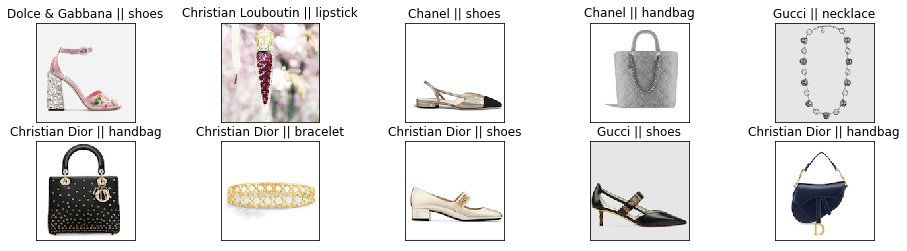

In [6]:
def display_images(img_path,ax):
    img=cv2.imread("../input/style/"+img_path)
    ax.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))    
fig=pl.figure(figsize=(16,4))
for i in range(10):
    ax=fig.add_subplot(2,5,i+1,xticks=[],yticks=[], 
                       title=data['brand_name'][N[i]]+\
                       ' || '+data['product_name'][N[i]])
    display_images(data['file'][N[i]],ax)

In [7]:
f=h5py.File('../input/StyleColorImages.h5','r')
keys=list(f.keys())
brands=np.array(f[keys[0]])
images=np.array(f[keys[1]])/255 # normalization
products=np.array(f[keys[2]])

Product:  lipstick
Brand:  Christian Louboutin


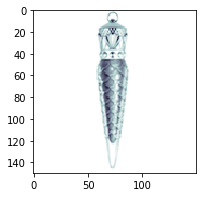

In [8]:
gray_images=np.dot(images[...,:3],[.299,.587,.114])
print('Product: ',data['product_name'][100])
print('Brand: ',data['brand_name'][100])
pl.figure(figsize=(3,3))
pl.imshow(gray_images[100],cmap=pl.cm.bone); pl.show()
gray_images=gray_images.reshape(-1,150,150,1)

In [9]:
cbrands,cproducts=ohe(brands),ohe(products)
ctargets=np.concatenate((cbrands,cproducts),axis=1)
pd.DataFrame([images.shape,gray_images.shape,
              cbrands.shape,cproducts.shape,ctargets.shape])

,0,1,2,3
0,2184,150,150.0,3.0
1,2184,150,150.0,1.0
2,2184,7,NaN,NaN
3,2184,10,NaN,NaN
4,2184,17,NaN,NaN


In [10]:
# Color Images / Brand 
x_train1,x_valid1,x_test1,\
y_train1,y_valid1,y_test1=tts(images,cbrands)
# Grayscaled Images / Brand 
x_train2,x_valid2,x_test2,\
y_train2,y_valid2,y_test2=tts(gray_images,cbrands)
sh=[el.shape for el in \
[x_train1,y_train1,x_valid1,y_valid1,x_test1,y_test1,
 x_train2,y_train2,x_valid2,y_valid2,x_test2,y_test2]]
pd.DataFrame(sh)

,0,1,2,3
0,1747,150,150.0,3.0
1,1747,7,NaN,NaN
2,218,150,150.0,3.0
3,218,7,NaN,NaN
4,219,150,150.0,3.0
5,219,7,NaN,NaN
6,1747,150,150.0,1.0
7,1747,7,NaN,NaN
8,218,150,150.0,1.0
9,218,7,NaN,NaN


<h1 class='font-effect-fire-animation' style='color:slategray; font-family:Akronim;'> &#x1F310; &nbsp; One-Label Classification Models </h1>

In [11]:
# Color Images, Brands
def model():
    model=Sequential()
    model.add(Conv2D(32,(5,5),padding='same',
                     input_shape=x_train1.shape[1:]))
    model.add(LeakyReLU(alpha=.02))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.25))
    model.add(Conv2D(196,(5,5)))
    model.add(LeakyReLU(alpha=.02))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.25))
    model.add(GlobalMaxPooling2D())    
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.5))     
    model.add(Dense(7))
    model.add(Activation('softmax'))    
    model.compile(loss='categorical_crossentropy',
                  optimizer='nadam',metrics=['accuracy'])    
    return model
model=model()

In [12]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.5)
estopping=EarlyStopping(monitor='val_loss',patience=16,verbose=2)
history=model.fit(x_train1,y_train1,epochs=128,batch_size=128,verbose=2,
                  validation_data=(x_valid1,y_valid1),
                  callbacks=[checkpointer,lr_reduction,estopping])

Train on 1747 samples, validate on 218 samples
Epoch 1/128
 - 16s - loss: 1.9924 - acc: 0.1986 - val_loss: 1.9216 - val_acc: 0.2385

Epoch 00001: val_loss improved from inf to 1.92161, saving model to weights.style.hdf5
Epoch 2/128
 - 3s - loss: 1.8917 - acc: 0.2324 - val_loss: 1.9183 - val_acc: 0.2064

Epoch 00002: val_loss improved from 1.92161 to 1.91831, saving model to weights.style.hdf5
Epoch 3/128
 - 2s - loss: 1.8637 - acc: 0.2433 - val_loss: 1.8365 - val_acc: 0.3073

Epoch 00003: val_loss improved from 1.91831 to 1.83650, saving model to weights.style.hdf5
Epoch 4/128
 - 2s - loss: 1.8183 - acc: 0.2902 - val_loss: 1.8844 - val_acc: 0.2339

Epoch 00004: val_loss did not improve
Epoch 5/128
 - 2s - loss: 1.8504 - acc: 0.2753 - val_loss: 1.8804 - val_acc: 0.1972

Epoch 00005: val_loss did not improve
Epoch 6/128
 - 2s - loss: 1.8326 - acc: 0.2604 - val_loss: 1.8059 - val_acc: 0.2706

Epoch 00006: val_loss improved from 1.83650 to 1.80589, saving model to weights.style.hdf5
Epoch 

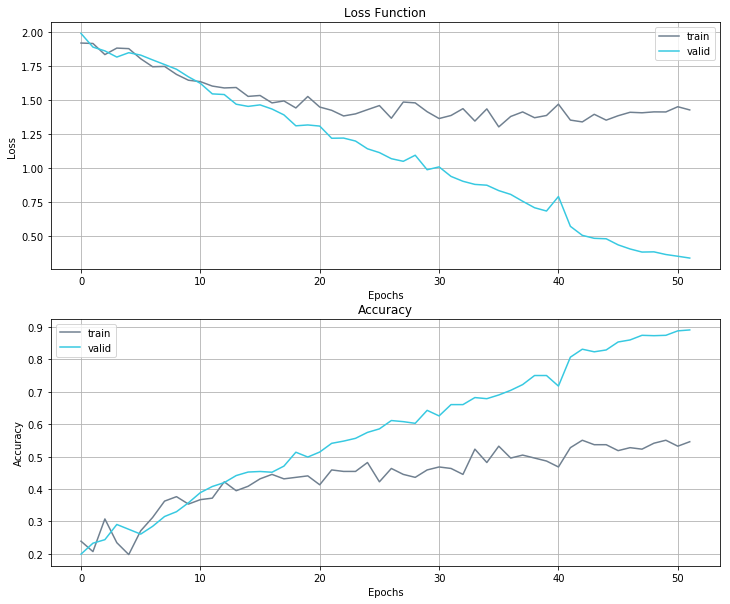

219/219 [==============================] - 0s 1ms/step


[1.2535155418256647, 0.5662100434847618]

In [13]:
history_plot(history)
model.load_weights(fw)
model.evaluate(x_test1,y_test1)

In [14]:
# Grayscaled Images, Brands
def gray_model():
    model=Sequential()
    model.add(Conv2D(32,(5,5),padding='same',
                     input_shape=x_train2.shape[1:]))
    model.add(LeakyReLU(alpha=.02))    
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.25))
    model.add(Conv2D(196,(5,5)))
    model.add(LeakyReLU(alpha=.02))  
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(.25))
    model.add(GlobalMaxPooling2D())   
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.25)) 
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=.02))
    model.add(Dropout(.25))
    model.add(Dense(7))
    model.add(Activation('softmax'))    
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',metrics=['accuracy'])    
    return model
gray_model=gray_model()

In [15]:
checkpointer=ModelCheckpoint(filepath=fw,verbose=2,save_best_only=True)
lr_reduction=ReduceLROnPlateau(monitor='val_loss',patience=5,
                               verbose=2,factor=.5)
estopping=EarlyStopping(monitor='val_loss',patience=16,verbose=2)
history=gray_model.fit(x_train2,y_train2,epochs=128,batch_size=128,
                       verbose=2,validation_data=(x_valid2,y_valid2),
                       callbacks=[checkpointer,lr_reduction,estopping])

Train on 1747 samples, validate on 218 samples
Epoch 1/128
 - 3s - loss: 1.9498 - acc: 0.1843 - val_loss: 1.9226 - val_acc: 0.2339

Epoch 00001: val_loss improved from inf to 1.92264, saving model to weights.style.hdf5
Epoch 2/128
 - 2s - loss: 1.9254 - acc: 0.2147 - val_loss: 1.9208 - val_acc: 0.2339

Epoch 00002: val_loss improved from 1.92264 to 1.92082, saving model to weights.style.hdf5
Epoch 3/128
 - 2s - loss: 1.9103 - acc: 0.2204 - val_loss: 1.8978 - val_acc: 0.2661

Epoch 00003: val_loss improved from 1.92082 to 1.89781, saving model to weights.style.hdf5
Epoch 4/128
 - 2s - loss: 1.8832 - acc: 0.2398 - val_loss: 1.8572 - val_acc: 0.2385

Epoch 00004: val_loss improved from 1.89781 to 1.85722, saving model to weights.style.hdf5
Epoch 5/128
 - 2s - loss: 1.8623 - acc: 0.2707 - val_loss: 1.8715 - val_acc: 0.3349

Epoch 00005: val_loss did not improve
Epoch 6/128
 - 2s - loss: 1.8056 - acc: 0.3022 - val_loss: 1.7775 - val_acc: 0.2982

Epoch 00006: val_loss improved from 1.85722 t

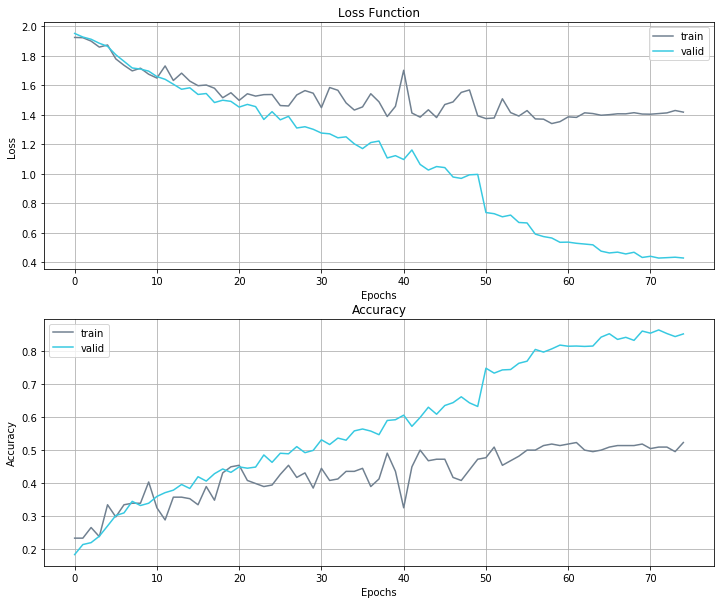

219/219 [==============================] - 0s 506us/step


[1.3924062954236383, 0.5022831055671657]

In [16]:
history_plot(history)
gray_model.load_weights(fw)
gray_model.evaluate(x_test2,y_test2)